In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

# Load the bigquery magic
%load_ext google.cloud.bigquery

In [ ]:
#pip install google-cloud-bigquery
#pip install --upgrade pip
#pip install google-cloud-bigquery google-cloud-bigquery-storage pyarrow tqdm
#pip install --upgrade jupyter ipywidgets

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'ccbd-exam-2024-afzal-sameer-f29e6671d557.json'

client = bigquery.Client()

In [3]:
average_unit_price_of_products_in_product_category = """
SELECT 
  `Product Category`, 
  AVG(`Unit Price`) AS `Average Unit Price`
FROM 
  `online_sales.sale`
GROUP BY 
  `Product Category`
ORDER BY 
  `Average Unit Price` DESC;
"""

average_unit_price_product_category_query = client.query(average_unit_price_of_products_in_product_category)
query_1 = average_unit_price_product_category_query.to_dataframe()
query_1.head()

,Product Category,Average Unit Price
0,Electronics,691.5915
1,Home Appliances,320.1855
2,Sports,261.2840
3,Clothing,67.5365
4,Beauty Products,61.6230


In [6]:
%%bigquery average_unit_price_of_products_in_product_category
SELECT 
  `Product Category`, 
  AVG(`Unit Price`) AS `Average Unit Price`
FROM 
  online_sales.sale
GROUP BY 
  `Product Category`
ORDER BY 
  `Average Unit Price` DESC;

Query is running:   0%|          |

Downloading:   0%|          |

In [40]:
%%bigquery  most_popular_payment_method_region
SELECT 
  `Region`, 
  `Payment Method`, 
  COUNT(*) AS `Number of Transactions`
FROM 
  `online_sales.sale`
GROUP BY 
  `Region`, 
  `Payment Method`
ORDER BY 
  `Region`, 
  `Number of Transactions` DESC;

Query is running:   0%|          |

Downloading:   0%|          |

In [9]:
%%bigquery product_sold_region
SELECT 
  `Region`, 
  `Product Name`, 
  SUM(`Units Sold`) AS `Total Units Sold`
FROM 
  `online_sales.sale`
GROUP BY 
  `Region`, 
  `Product Name`
ORDER BY 
  `Region`, 
  `Total Units Sold` DESC;

Query is running:   0%|          |

Downloading:   0%|          |

In [10]:
%%bigquery revenue_product_category
SELECT 
  `Product Category`, 
  SUM(`Total Revenue`) AS `Total Revenue`
FROM 
  `online_sales.sale`
GROUP BY 
  `Product Category`
ORDER BY 
  `Total Revenue` DESC;

Query is running:   0%|          |

Downloading:   0%|          |

In [11]:
%%bigquery total_revenue_generated_month
SELECT 
  EXTRACT(YEAR FROM `Date`) AS `Year`,
  EXTRACT(MONTH FROM `Date`) AS `Month`, 
  SUM(`Total Revenue`) AS `Total Revenue`
FROM 
  `online_sales.sale`
GROUP BY 
  `Year`, 
  `Month`
ORDER BY 
  `Year`, 
  `Month`;

Query is running:   0%|          |

Downloading:   0%|          |

In [22]:
print("average unit price of products in each product category")

average unit price of products in each product category


In [23]:
average_unit_price_of_products_in_product_category.head()

,Product Category,Average Unit Price
0,Electronics,691.5915
1,Home Appliances,320.1855
2,Sports,261.2840
3,Clothing,67.5365
4,Beauty Products,61.6230


C:\Users\samee\AppData\Local\Temp\ipykernel_1780\1952045501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Unit Price', y='Product Category', data=average_unit_price_of_products_in_product_category, palette='viridis')


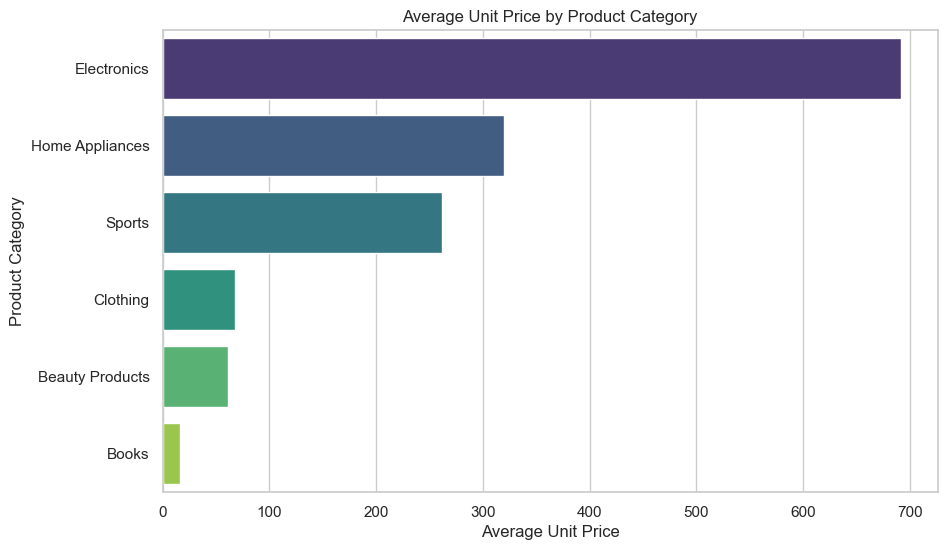

In [24]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Average Unit Price', y='Product Category', data=average_unit_price_of_products_in_product_category, palette='viridis')

# Add titles and labels
plt.title('Average Unit Price by Product Category')
plt.xlabel('Average Unit Price')
plt.ylabel('Product Category')

# Show the plot
plt.show()

In [38]:
print("payment method is most popular in each region")

payment method is most popular in each region


In [41]:
most_popular_payment_method_region.head()

,Region,Payment Method,Number of Transactions
0,Asia,Credit Card,40
1,Asia,Debit Card,40
2,Europe,PayPal,80
3,North America,Credit Card,80


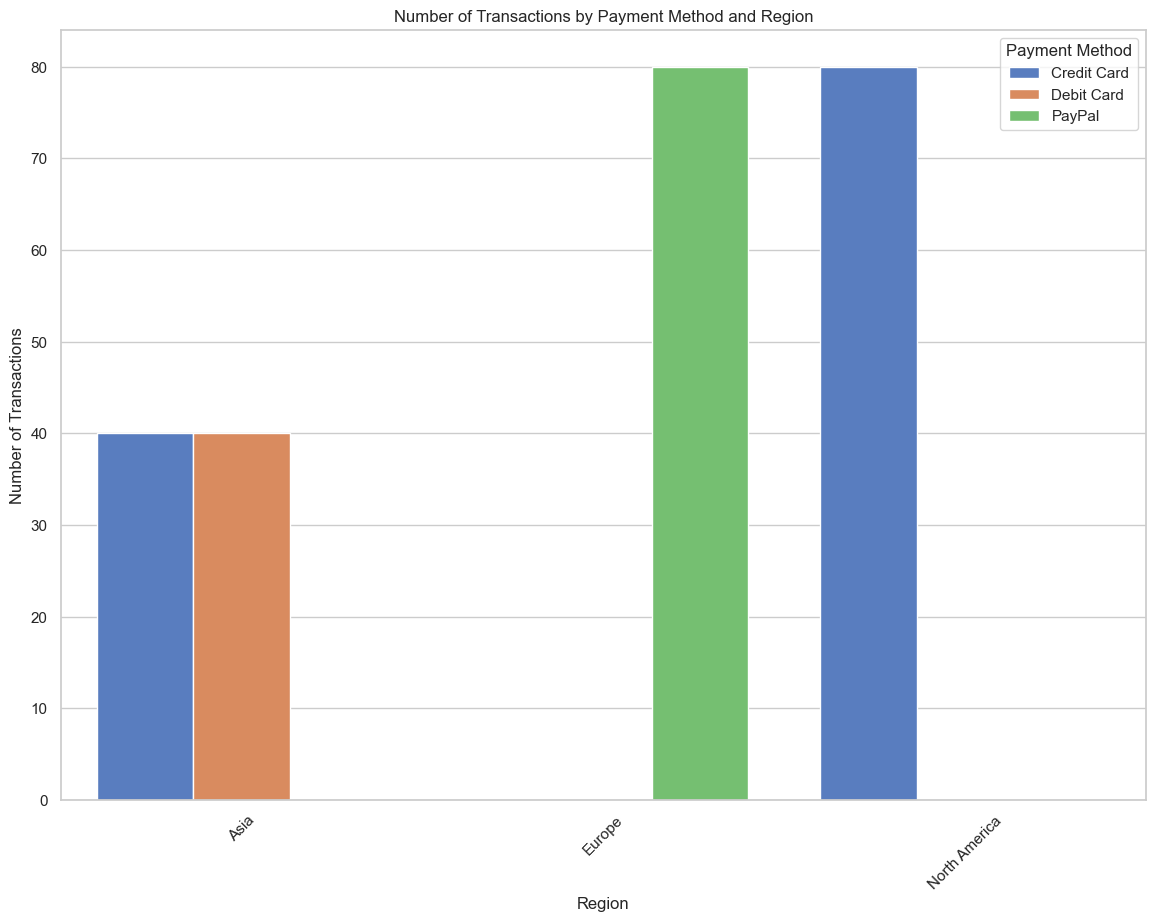

In [42]:
df = most_popular_payment_method_region

df['Number of Transactions'] = pd.to_numeric(df['Number of Transactions'], errors='coerce')

# Drop any rows with NaN values
df = df.dropna(subset=['Number of Transactions'])

# Set the size of the plot
plt.figure(figsize=(14, 10))

# Create a grouped bar plot
sns.barplot(x='Region', y='Number of Transactions', hue='Payment Method', data=df, palette='muted')

# Add titles and labels
plt.title('Number of Transactions by Payment Method and Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Payment Method')
plt.show()

In [ ]:
print("product were sold in each region")


In [37]:
product_sold_region.head()

,Region,Product Name,Total Units Sold
0,Asia,Hanes ComfortSoft T-Shirt,10
1,Asia,Yeti Rambler Tumbler,6
2,Asia,Spalding NBA Street Basketball,6
3,Asia,Nike Air Force 1,6
4,Asia,Gap Essential Crewneck T-Shirt,6


C:\Users\samee\AppData\Local\Temp\ipykernel_1780\2226420730.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


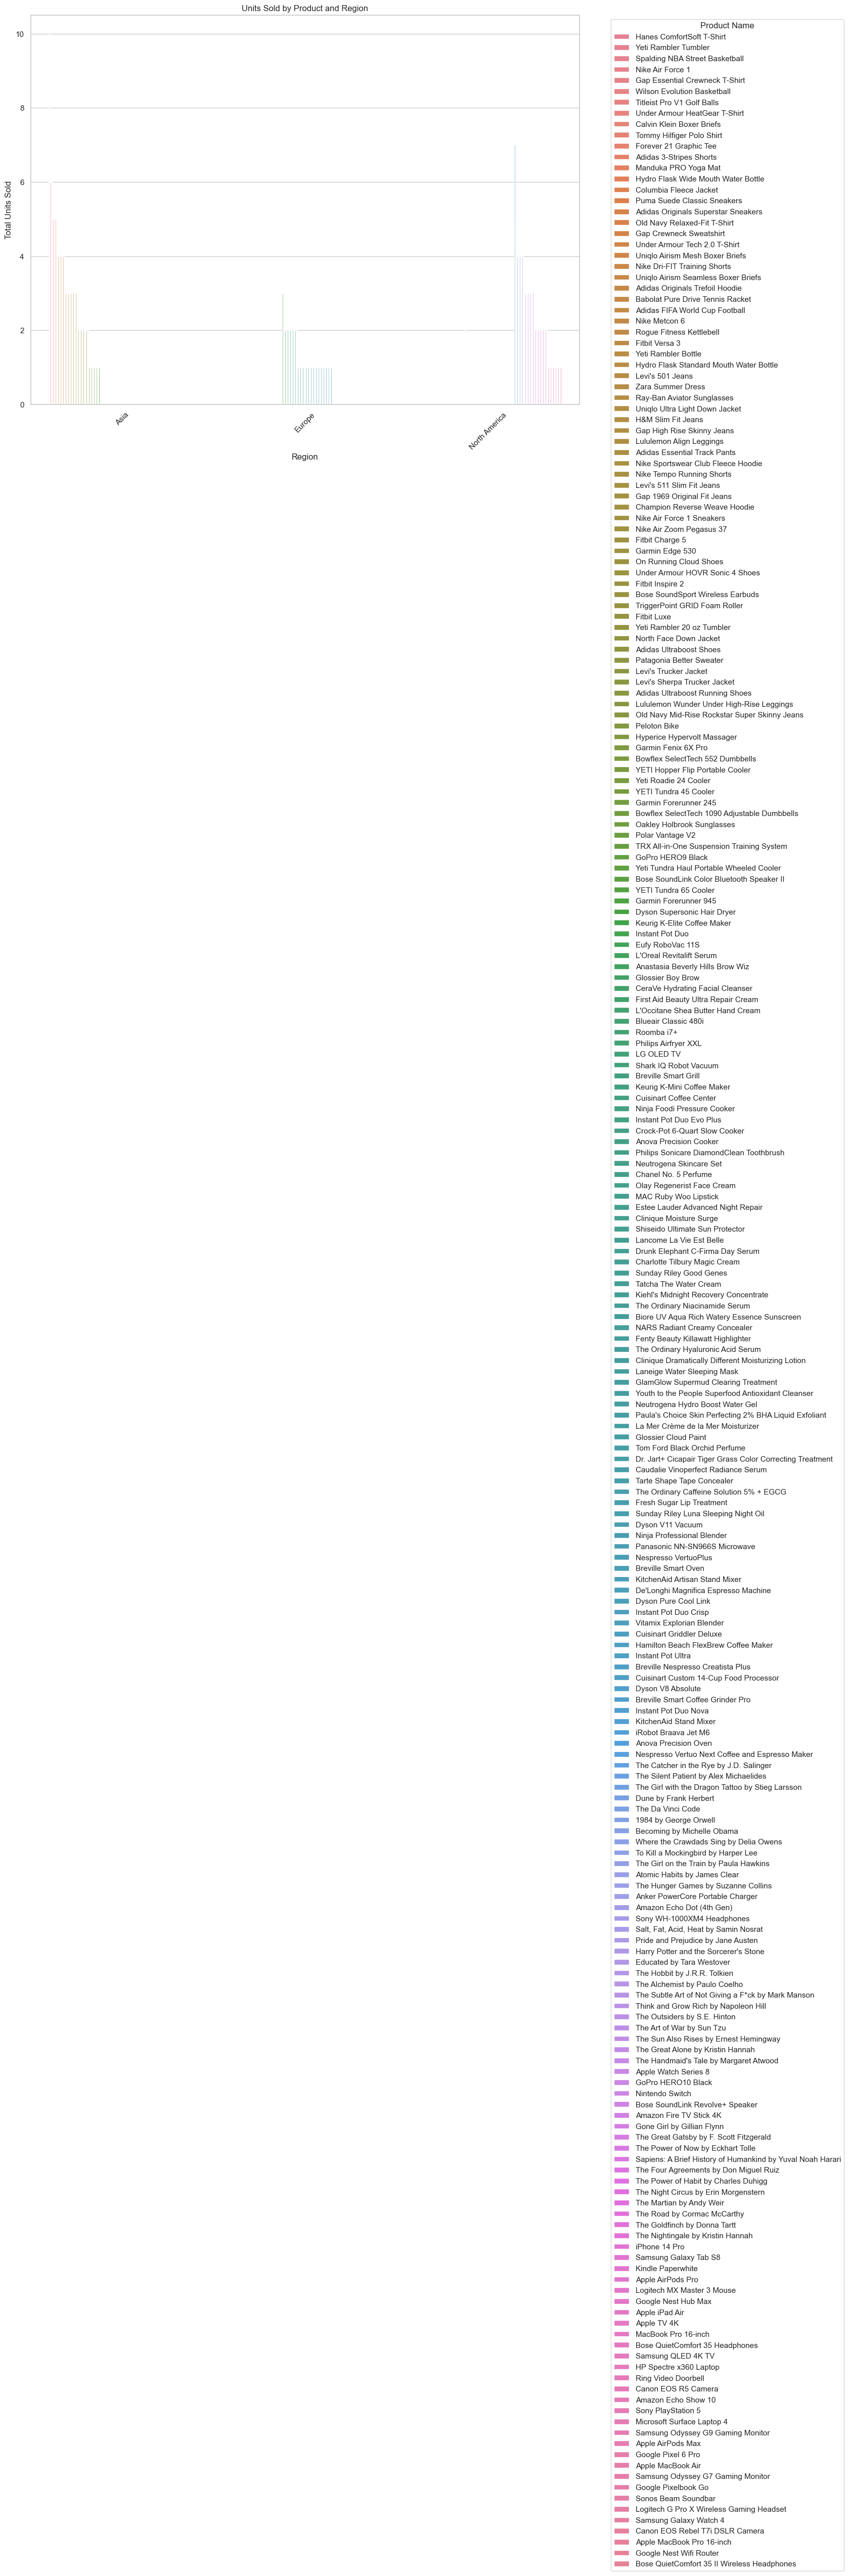

In [51]:
df_units_sold = product_sold_region

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(x='Region', y='Total Units Sold', hue='Product Name', data=df_units_sold)
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.title('Units Sold by Product and Region')
plt.xticks(rotation=45)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [48]:
print("revenue generated by each product category")

revenue generated by each product category


In [47]:
revenue_product_category.head()

,Product Category,Total Revenue
0,Electronics,34982.41
1,Home Appliances,18646.16
2,Sports,14326.52
3,Clothing,8128.93
4,Beauty Products,2621.90


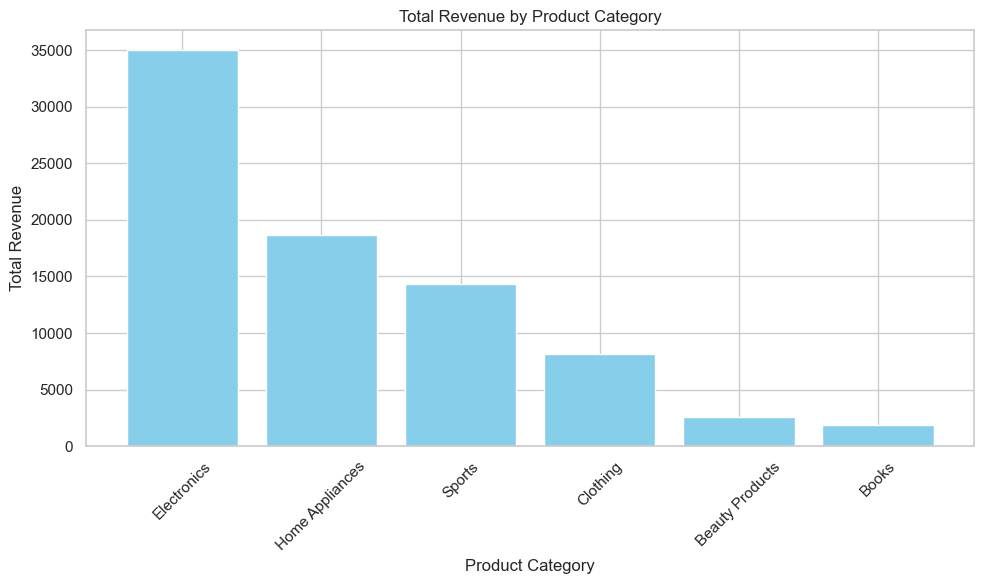

In [46]:
df_total_revenue = revenue_product_category

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_total_revenue['Product Category'], df_total_revenue['Total Revenue'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print("total revenue generated each month")

In [ ]:
print(total_revenue_generated_month.head())

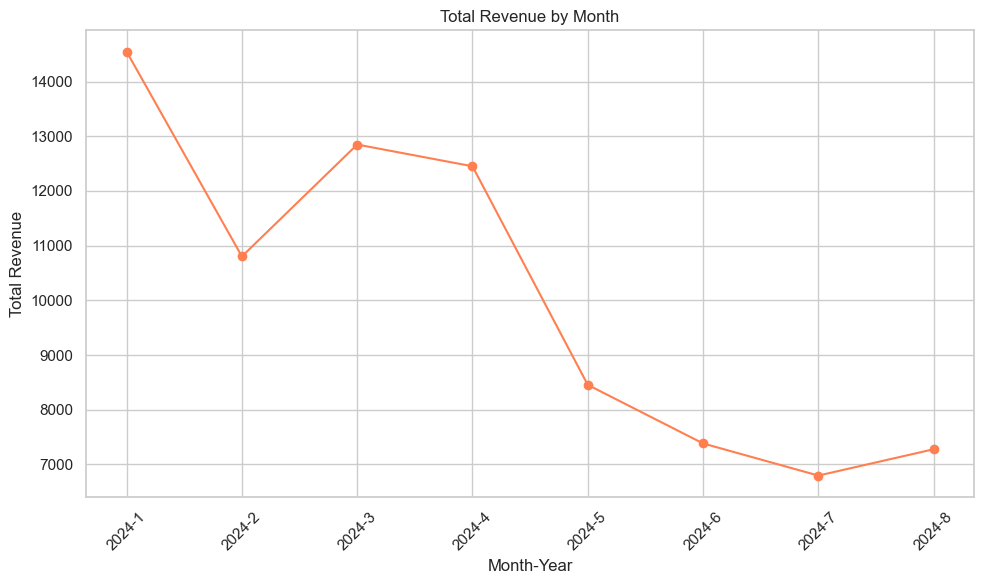

In [44]:

df_revenue = total_revenue_generated_month
df_revenue['Month-Year'] = df_revenue['Year'].astype(str) + '-' + df_revenue['Month'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_revenue['Month-Year'], df_revenue['Total Revenue'], marker='o', color='coral')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()